In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
movies = pd.read_csv('./datasets/movies-with-rating-and-vote-count.csv')

In [3]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  average_rating  vote_count  
0  Adventure|Animation|Children|Comedy|Fantasy        3.920930       215.0  
1                   Adventure|Children|Fantasy        3.431818       110.0  
2                               Comedy|Romance        3.259615        52.0  
3                         Comedy|Drama|Romance        2.357143         7.0  
4                                       Comedy        3.071429        49.0

## Dummyfication

In [4]:
dummy_genres = movies.genres.str.get_dummies('|')

In [5]:
dummy_genres

(no genres listed)  Action  Adventure  Animation  Children  Comedy  \
0                      0       0          1          1         1       1   
1                      0       0          1          0         1       0   
2                      0       0          0          0         0       1   
3                      0       0          0          0         0       1   
4                      0       0          0          0         0       1   
...                  ...     ...        ...        ...       ...     ...   
9732                   0       1          0          1         0       1   
9733                   0       0          0          1         0       1   
9734                   0       0          0          0         0       0   
9735                   0       1          0          1         0       0   
9736                   0       0          0          0         0       1   

      Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  IMAX  Musical  \
0         0            0      0        1          0       0     0        0   
1         0            0      0        1          0       0     0        0   
2         0            0      0        0          0       0     0        0   
3         0            0      1        0          0       0     0        0   
4         0            0      0        0          0       0     0        0   
...     ...          ...    ...      ...        ...     ...   ...      ...   
9732      0            0      0        1          0       0     0        0   
9733      0            0      0        1          0       0     0        0   
9734      0            0      1        0          0       0     0        0   
9735      0            0      0        0          0       0     0        0   
9736      0            0      0        0          0       0     0        0   

      Mystery  Romance  Sci-Fi  Thriller  War  Western  
0           0        0       0         0    0        0  
1           0        0       0         0    0        0  
2           0        1       0         0    0        0  
3           0        1       0         0    0        0  
4           0        0       0         0    0        0  
...       ...      ...     ...       ...  ...      ...  
9732        0        0       0         0    0        0  
9733        0        0       0         0    0        0  
9734        0        0       0         0    0        0  
9735        0        0       0         0    0        0  
9736        0        0       0         0    0        0  

[9737 rows x 20 columns]

In [6]:
dummy_genres['movieId'] = movies.movieId

In [7]:
movies = movies.merge(dummy_genres, on='movieId')

In [8]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  average_rating  vote_count  \
0  Adventure|Animation|Children|Comedy|Fantasy        3.920930       215.0   
1                   Adventure|Children|Fantasy        3.431818       110.0   
2                               Comedy|Romance        3.259615        52.0   
3                         Comedy|Drama|Romance        2.357143         7.0   
4                                       Comedy        3.071429        49.0   

   (no genres listed)  Action  Adventure  Animation  Children  ...  Film-Noir  \
0                   0       0          1          1         1  ...          0   
1                   0       0          1          0         1  ...          0   
2                   0       0          0          0         0  ...          0   
3                   0       0          0          0         0  ...          0   
4                   0       0          0          0         0  ...          0   

   Horror  IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0       0     0        0        0        0       0         0    0        0  
1       0     0        0        0        0       0         0    0        0  
2       0     0        0        0        1       0         0    0        0  
3       0     0        0        0        1       0         0    0        0  
4       0     0        0        0        0       0         0    0        0  

[5 rows x 25 columns]

In [9]:
movies[movies['(no genres listed)'] == 1]

movieId                                              title  \
8515   114335                                  La cravate (1957)   
8682   122888                                     Ben-hur (2016)   
8685   122896  Pirates of the Caribbean: Dead Men Tell No Tal...   
8780   129250                                  Superfast! (2015)   
8834   132084                                Let It Be Me (1995)   
8900   134861               Trevor Noah: African American (2013)   
9031   141131                                   Guardians (2016)   
9051   141866                                  Green Room (2015)   
9068   142456                     The Brand New Testament (2015)   
9089   143410                                         Hyena Road   
9134   147250  The Adventures of Sherlock Holmes and Doctor W...   
9174   149330                          A Cosmic Christmas (1977)   
9213   152037                                 Grease Live (2016)   
9244   155589                             Noin 7 veljestä (1968)   
9255   156605                                           Paterson   
9303   159161                        Ali Wong: Baby Cobra (2016)   
9312   159779                   A Midsummer Night's Dream (2016)   
9344   161008                         The Forbidden Dance (1990)   
9409   165489                              Ethel & Ernest (2016)   
9422   166024                                    Whiplash (2013)   
9444   167570                                             The OA   
9473   169034                                    Lemonade (2016)   
9509   171495                                             Cosmos   
9510   171631                            Maria Bamford: Old Baby   
9513   171749                  Death Note: Desu nôto (2006–2007)   
9520   171891                                  Generation Iron 2   
9529   172497                  T2 3-D: Battle Across Time (1996)   
9536   172591            The Godfather Trilogy: 1972-1990 (1992)   
9557   173535  The Adventures of Sherlock Holmes and Doctor W...   
9568   174403                        The Putin Interviews (2017)   
9606   176601                                       Black Mirror   
9656   181413  Too Funny to Fail: The Life and Death of The D...   
9658   181719  Serving in Silence: The Margarethe Cammermeyer...   
9664   182727                     A Christmas Story Live! (2017)   

                  genres  average_rating  vote_count  (no genres listed)  \
8515  (no genres listed)        3.000000         1.0                   1   
8682  (no genres listed)        0.500000         1.0                   1   
8685  (no genres listed)        3.785714         7.0                   1   
8780  (no genres listed)        0.500000         1.0                   1   
8834  (no genres listed)        2.500000         1.0                   1   
8900  (no genres listed)        2.500000         1.0                   1   
9031  (no genres listed)        2.500000         1.0                   1   
9051  (no genres listed)        3.333333         3.0                   1   
9068  (no genres listed)        4.000000         2.0                   1   
9089  (no genres listed)        2.000000         1.0                   1   
9134  (no genres listed)        5.000000         1.0                   1   
9174  (no genres listed)        4.000000         1.0                   1   
9213  (no genres listed)        2.000000         2.0                   1   
9244  (no genres listed)        3.000000         1.0                   1   
9255  (no genres listed)        4.500000         1.0                   1   
9303  (no genres listed)        4.500000         1.0                   1   
9312  (no genres listed)        4.000000         1.0                   1   
9344  (no genres listed)        2.500000         1.0                   1   
9409  (no genres listed)        2.500000         1.0                   1   
9422  (no genres listed)        4.750000         2.0                   1   
9444  (no genres listed)     

In [10]:
movies_without_genres = movies[movies['(no genres listed)'] == 1].movieId.values

In [28]:
movies_without_genres

array([114335, 122888, 122896, 129250, 132084, 134861, 141131, 141866,
       142456, 143410, 147250, 149330, 152037, 155589, 156605, 159161,
       159779, 161008, 165489, 166024, 167570, 169034, 171495, 171631,
       171749, 171891, 172497, 172591, 173535, 174403, 176601, 181413,
       181719, 182727])

In [12]:
tags = pd.read_csv('./datasets/tags.csv')
tags.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [29]:
tags[tags.movieId.isin(movies_without_genres) ]

userId  movieId          tag   timestamp
3279     567   156605       quirky  1525283453
3280     567   156605        sweet  1525283455
3281     567   156605  understated  1525283456

In [30]:
tags[tags.movieId == 1]

userId  movieId    tag   timestamp
629      336        1  pixar  1139045764
981      474        1  pixar  1137206825
2886     567        1    fun  1525286013

In [14]:
pd.Series(tags.tag.unique())

0                  funny
1        Highly quotable
2           will ferrell
3           Boxing story
4                    MMA
              ...       
1584           for katie
1585             austere
1586              gun fu
1587    heroic bloodshed
1588    Heroic Bloodshed
Length: 1589, dtype: object

In [15]:
tags_by_movie = tags.groupby('movieId')['tag'].apply(lambda values: ','.join(values))

In [16]:
tags_by_movie.head()

movieId
1                                 pixar,pixar,fun
2    fantasy,magic board game,Robin Williams,game
3                                       moldy,old
5                                pregnancy,remake
7                                          remake
Name: tag, dtype: object

In [17]:
movies = movies.merge(tags_by_movie, on='movieId')

In [18]:
dummy_tags = movies.tag.str.get_dummies(',')
dummy_tags.head()

"artsy"  06 Oscar Nominated Best Movie - Animation  1900s  1920s  1950s  \
0        0                                          0      0      0      0   
1        0                                          0      0      0      0   
2        0                                          0      0      0      0   
3        0                                          0      0      0      0   
4        0                                          0      0      0      0   

   1960s  1970s  1980s  1990s  2001-like  ...  women  wonderwoman  workplace  \
0      0      0      0      0          0  ...      0            0          0   
1      0      0      0      0          0  ...      0            0          0   
2      0      0      0      0          0  ...      0            0          0   
3      0      0      0      0          0  ...      0            0          0   
4      0      0      0      0          0  ...      0            0          0   

   writing  wrongful imprisonment  wry  younger men  zither  zoe kazan  \
0        0                      0    0            0       0          0   
1        0                      0    0            0       0          0   
2        0                      0    0            0       0          0   
3        0                      0    0            0       0          0   
4        0                      0    0            0       0          0   

   zombies  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 1589 columns]

In [19]:
dummy_tags['movieId'] = movies.movieId

In [20]:
movies = movies.merge(dummy_tags, on='movieId')
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        5  Father of the Bride Part II (1995)   
4        7                      Sabrina (1995)   

                                        genres  average_rating  vote_count  \
0  Adventure|Animation|Children|Comedy|Fantasy        3.920930       215.0   
1                   Adventure|Children|Fantasy        3.431818       110.0   
2                               Comedy|Romance        3.259615        52.0   
3                                       Comedy        3.071429        49.0   
4                               Comedy|Romance        3.185185        54.0   

   (no genres listed)  Action_x  Adventure_x  Animation_x  Children  ...  \
0                   0         0            1            1         1  ...   
1                   0         0            1            0         1  ...   
2                   0         0            0            0         0  ...   
3                   0         0            0            0         0  ...   
4                   0         0            0            0         0  ...   

   women  wonderwoman  workplace  writing  wrongful imprisonment  wry  \
0      0            0          0        0                      0    0   
1      0            0          0        0                      0    0   
2      0            0          0        0                      0    0   
3      0            0          0        0                      0    0   
4      0            0          0        0                      0    0   

   younger men  zither  zoe kazan  zombies  
0            0       0          0        0  
1            0       0          0        0  
2            0       0          0        0  
3            0       0          0        0  
4            0       0          0        0  

[5 rows x 1615 columns]

In [21]:
from sklearn.cluster import KMeans 

In [22]:
features = movies.columns.difference(['movieId', 'title', 'genres', 'average_rating', 'vote_count', 'tag'])

In [23]:
model = KMeans(n_clusters=30)

x = movies[features]

In [24]:
groups = model.fit_predict(x)

In [25]:
groups[:10]

array([16, 18, 10,  2, 10,  3,  1, 23,  0,  2], dtype=int32)

In [26]:
movies['group'] = groups

In [31]:
toy_story = movies[movies.title == 'Toy Story (1995)']

toy_story.group.values

In [32]:
toy_story

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   average_rating  vote_count  (no genres listed)  Action_x  Adventure_x  \
0         3.92093       215.0                   0         0            1   

   Animation_x  Children  ...  wonderwoman  workplace  writing  \
0            1         1  ...            0          0        0   

   wrongful imprisonment  wry  younger men  zither  zoe kazan  zombies  group  
0                      0    0            0       0          0        0     16  

[1 rows x 1616 columns]

In [33]:
toy_story_group = toy_story.group.values[0]

In [34]:
toy_story_group

16

In [35]:
toy_story_simmilar_movies = movies[ movies.group == toy_story_group ]

In [36]:
toy_story_simmilar_movies

movieId                                              title  \
0           1                                   Toy Story (1995)   
35        107                      Muppet Treasure Island (1996)   
160       673                                   Space Jam (1996)   
163       720  Wallace & Gromit: The Best of Aardman Animatio...   
167       745             Wallace & Gromit: A Close Shave (1995)   
237       986                               Fly Away Home (1996)   
277      1148        Wallace & Gromit: The Wrong Trousers (1993)   
308      1223    Grand Day Out with Wallace and Gromit, A (1989)   
376      1367                              101 Dalmatians (1996)   
489      2054                    Honey, I Shrunk the Kids (1989)   
506      2116                      Lord of the Rings, The (1978)   
511      2138                              Watership Down (1978)   
512      2139                         Secret of NIMH, The (1982)   
544      2355                               Bug's Life, A (1998)   
613      2761                             Iron Giant, The (1999)   
643      2987                    Who Framed Roger Rabbit? (1988)   
666      3114                                 Toy Story 2 (1999)   
805      4232                                    Spy Kids (2001)   
812      4306                                       Shrek (2001)   
832      4477                             Big Top Pee-Wee (1988)   
999      6297                                       Holes (2003)   
1011     6350  Laputa: Castle in the Sky (Tenkû no shiro Rapy...   
1016     6377                                Finding Nemo (2003)   
1033     6536            Sinbad: Legend of the Seven Seas (2003)   
1208     8360                                     Shrek 2 (2004)   
1254     8961                            Incredibles, The (2004)   
1274    26662  Kiki's Delivery Service (Majo no takkyûbin) (1...   
1276    26776  Porco Rosso (Crimson Pig) (Kurenai no buta) (1...   
1280    27706  Lemony Snicket's A Series of Unfortunate Event...   
1281    27731         Cat Returns, The (Neko no ongaeshi) (2002)   
1294    30793           Charlie and the Chocolate Factory (2005)   
1339    38038  Wallace & Gromit in The Curse of the Were-Rabb...   
1377    52287                          Meet the Robinsons (2007)   
1403    60069                                      WALL·E (2008)   
1406    60516                                   Meet Dave (2008)   
1427    68954                                          Up (2009)   
1479   101142                                 Croods, The (2013)   
1497   108932                              The Lego Movie (2014)   
1513   117877         The Rabbi's Cat (Le chat du rabbin) (2011)   

                                                 genres  average_rating  \
0           Adventure|Animation|Children|Comedy|Fantasy        3.920930   
35                    Adventure|Children|Comedy|Musical        3.326923   
160   Adventure|Animation|Children|Comedy|Fantasy|Sc...        2.707547   
163                          Adventure|Animation|Comedy        4.092593   
167                           Animation|Children|Comedy        3.895833   
237                                  Adventure|Children        3.538462   
277                     Animation|Children|Comedy|Crime        4.035714   
308          Adventure|Animation|Children|Comedy|Sci-Fi        4.089286   
376                           Adventure|Children|Comedy        3.074468   
489            Adventure|Children|Comedy|Fantasy|Sci-Fi        2.757353   
506                Adventure|Animation|Children|Fantasy        3.133333   
511          Adventure|Animation|Children|Drama|Fantasy        4.050000   
512                  Adventure|Animation|Children|Drama        3.476190   
544                 Adventure|Animation|Children|Comedy        3.516304   
613           Adventure|Animation|Children|Drama|Sci-Fi        4.051282   
643   Adventure|Animation|Children|Comedy|Crime|Fant...        3.572165   
666       

In [45]:
euclidean_distances(toy_story_simmilar_movies[features], movies[movies.movieId == 107][features]).reshape(-1,1)

array([[2.44948974],
       [0.        ],
       [2.44948974],
       [2.23606798],
       [2.23606798],
       [2.        ],
       [2.44948974],
       [2.23606798],
       [2.        ],
       [2.23606798],
       [2.64575131],
       [2.82842712],
       [2.44948974],
       [2.        ],
       [2.82842712],
       [2.64575131],
       [3.31662479],
       [2.        ],
       [2.44948974],
       [1.73205081],
       [2.        ],
       [2.82842712],
       [2.44948974],
       [2.44948974],
       [2.        ],
       [2.82842712],
       [2.64575131],
       [2.64575131],
       [2.82842712],
       [2.44948974],
       [2.23606798],
       [2.23606798],
       [2.44948974],
       [3.16227766],
       [2.23606798],
       [4.24264069],
       [2.64575131],
       [3.46410162],
       [2.64575131]])

In [40]:
from sklearn.metrics import euclidean_distances

In [46]:
toy_story_simmilar_movies['distance']  = euclidean_distances(toy_story_simmilar_movies[features],  toy_story[features]).reshape(-1,1)

<ipython-input-46-6fe1dfda9c03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toy_story_simmilar_movies['distance']  = euclidean_distances(toy_story_simmilar_movies[features],  toy_story[features]).reshape(-1,1)


In [48]:
toy_story_simmilar_movies

movieId                                              title  \
0           1                                   Toy Story (1995)   
35        107                      Muppet Treasure Island (1996)   
160       673                                   Space Jam (1996)   
163       720  Wallace & Gromit: The Best of Aardman Animatio...   
167       745             Wallace & Gromit: A Close Shave (1995)   
237       986                               Fly Away Home (1996)   
277      1148        Wallace & Gromit: The Wrong Trousers (1993)   
308      1223    Grand Day Out with Wallace and Gromit, A (1989)   
376      1367                              101 Dalmatians (1996)   
489      2054                    Honey, I Shrunk the Kids (1989)   
506      2116                      Lord of the Rings, The (1978)   
511      2138                              Watership Down (1978)   
512      2139                         Secret of NIMH, The (1982)   
544      2355                               Bug's Life, A (1998)   
613      2761                             Iron Giant, The (1999)   
643      2987                    Who Framed Roger Rabbit? (1988)   
666      3114                                 Toy Story 2 (1999)   
805      4232                                    Spy Kids (2001)   
812      4306                                       Shrek (2001)   
832      4477                             Big Top Pee-Wee (1988)   
999      6297                                       Holes (2003)   
1011     6350  Laputa: Castle in the Sky (Tenkû no shiro Rapy...   
1016     6377                                Finding Nemo (2003)   
1033     6536            Sinbad: Legend of the Seven Seas (2003)   
1208     8360                                     Shrek 2 (2004)   
1254     8961                            Incredibles, The (2004)   
1274    26662  Kiki's Delivery Service (Majo no takkyûbin) (1...   
1276    26776  Porco Rosso (Crimson Pig) (Kurenai no buta) (1...   
1280    27706  Lemony Snicket's A Series of Unfortunate Event...   
1281    27731         Cat Returns, The (Neko no ongaeshi) (2002)   
1294    30793           Charlie and the Chocolate Factory (2005)   
1339    38038  Wallace & Gromit in The Curse of the Were-Rabb...   
1377    52287                          Meet the Robinsons (2007)   
1403    60069                                      WALL·E (2008)   
1406    60516                                   Meet Dave (2008)   
1427    68954                                          Up (2009)   
1479   101142                                 Croods, The (2013)   
1497   108932                              The Lego Movie (2014)   
1513   117877         The Rabbi's Cat (Le chat du rabbin) (2011)   

                                                 genres  average_rating  \
0           Adventure|Animation|Children|Comedy|Fantasy        3.920930   
35                    Adventure|Children|Comedy|Musical        3.326923   
160   Adventure|Animation|Children|Comedy|Fantasy|Sc...        2.707547   
163                          Adventure|Animation|Comedy        4.092593   
167                           Animation|Children|Comedy        3.895833   
237                                  Adventure|Children        3.538462   
277                     Animation|Children|Comedy|Crime        4.035714   
308          Adventure|Animation|Children|Comedy|Sci-Fi        4.089286   
376                           Adventure|Children|Comedy        3.074468   
489            Adventure|Children|Comedy|Fantasy|Sci-Fi        2.757353   
506                Adventure|Animation|Children|Fantasy        3.133333   
511          Adventure|Animation|Children|Drama|Fantasy        4.050000   
512                  Adventure|Animation|Children|Drama        3.476190   
544                 Adventure|Animation|Children|Comedy        3.516304   
613           Adventure|Animation|Children|Drama|Sci-Fi        4.051282   
643   Adventure|Animation|Children|Comedy|Crime|Fant...        3.572165   
666       

In [47]:
toy_story_simmilar_movies.sort_values(by='distance')['title'][:10]

0                                        Toy Story (1995)
160                                      Space Jam (1996)
1281           Cat Returns, The (Neko no ongaeshi) (2002)
1033              Sinbad: Legend of the Seven Seas (2003)
812                                          Shrek (2001)
544                                  Bug's Life, A (1998)
1339    Wallace & Gromit in The Curse of the Were-Rabb...
1294             Charlie and the Chocolate Factory (2005)
1276    Porco Rosso (Crimson Pig) (Kurenai no buta) (1...
1274    Kiki's Delivery Service (Majo no takkyûbin) (1...
Name: title, dtype: object

In [49]:
movies.group.value_counts()

1     318
2     166
0     105
10     84
24     83
23     82
13     79
3      78
8      52
9      52
12     51
20     50
4      47
16     39
17     38
18     35
26     35
6      34
27     33
22     29
15     26
5      22
21     16
11      9
19      4
29      1
7       1
28      1
25      1
14      1
Name: group, dtype: int64

In [50]:
movies[movies.group == 29]

movieId                                       title  \
538     2324  Life Is Beautiful (La Vita è bella) (1997)   

                       genres  average_rating  vote_count  (no genres listed)  \
538  Comedy|Drama|Romance|War        4.147727        88.0                   0   

     Action_x  Adventure_x  Animation_x  Children  ...  wonderwoman  \
538         0            0            0         0  ...            0   

     workplace  writing  wrongful imprisonment  wry  younger men  zither  \
538          0        0                      0    0            0       0   

     zoe kazan  zombies  group  
538          0        0     29  

[1 rows x 1616 columns]

In [51]:
model.inertia_

4034.1840290609925

In [52]:
inertias = {}

for k in range(1, 40, 10):
    model = KMeans(n_clusters=k, max_iter=1000).fit(x)
    inertias[k] = model.inertia_

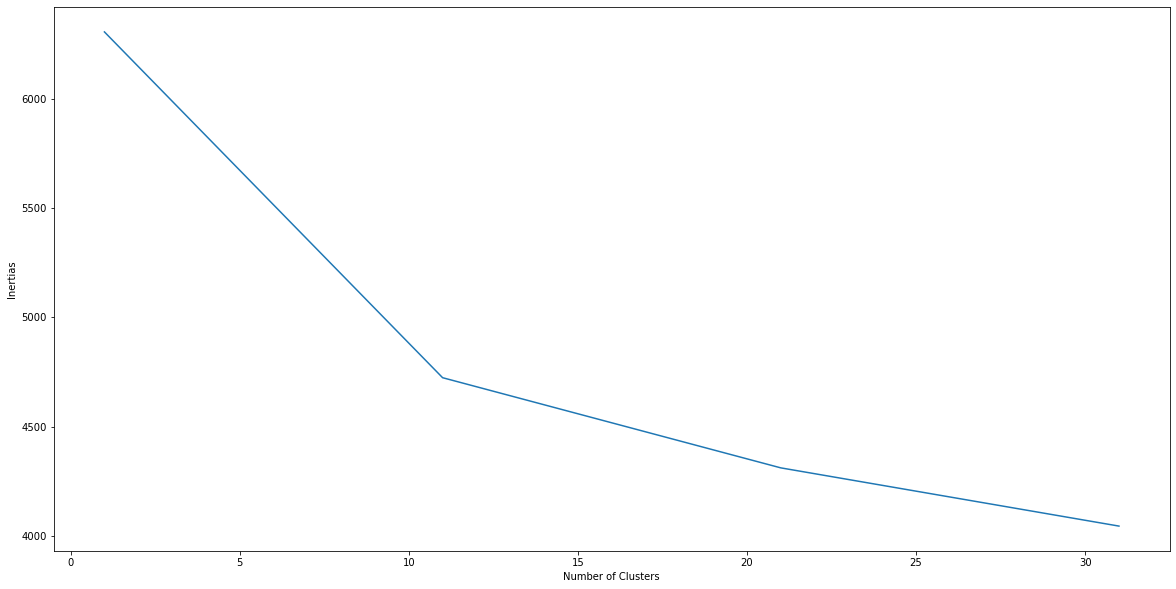

In [53]:
plt.figure(figsize=(20,10))
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.show()

In [75]:
groups = KMeans(n_clusters=10, max_iter=1000).fit_predict(x)

In [76]:
groups

array([7, 1, 3, ..., 6, 6, 6], dtype=int32)

In [77]:
movies2 = movies.copy()

In [78]:
movies2['group'] = groups

In [79]:
movies2.group.value_counts()

5    481
7    208
3    193
6    150
9    141
1    127
0    113
8     83
4     75
2      1
Name: group, dtype: int64

In [80]:
movies.group.value_counts()

1     318
2     166
0     105
10     84
24     83
23     82
13     79
3      78
8      52
9      52
12     51
20     50
4      47
16     39
17     38
18     35
26     35
6      34
27     33
22     29
15     26
5      22
21     16
11      9
19      4
29      1
7       1
28      1
25      1
14      1
Name: group, dtype: int64